<a href="https://colab.research.google.com/github/iqbalamo93/kerasTF/blob/master/CNN_Custom_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('//content/drive/')

Drive already mounted at //content/drive/; to attempt to forcibly remount, call drive.mount("//content/drive/", force_remount=True).


In [5]:
import shutil
shutil.rmtree('./content/drive/My Drive/Keras_Dataset/cell_images')

FileNotFoundError: ignored

In [6]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Keras_Dataset/cell_images.zip','r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Keras_Dataset/')

In [8]:
my_path='/content/drive/My Drive/Keras_Dataset/cell_images'

In [9]:
os.listdir(my_path)

['test', 'train']

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
from matplotlib.image import imread

In [12]:
test_path =os.path.join(my_path,'test')
train_path =os.path.join(my_path,'train')

In [13]:
os.listdir(test_path),os.listdir(train_path)

(['parasitized', 'uninfected'], ['parasitized', 'uninfected'])

In [14]:
test_first_para=os.listdir(test_path+'/parasitized')[0]

In [15]:
test_par_first= os.path.join(test_path,'parasitized',test_first_para)

In [16]:
imread(test_par_first)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [17]:
imread(test_par_first).shape

(136, 133, 3)

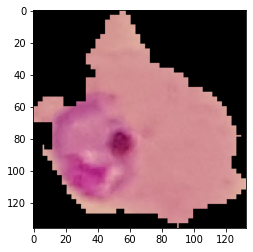

In [18]:
plt.imshow(imread(test_par_first))

In [19]:
first_image=os.listdir(test_path+'/uninfected')[0]
Uninfected_first= os.path.join(test_path,'uninfected',first_image)

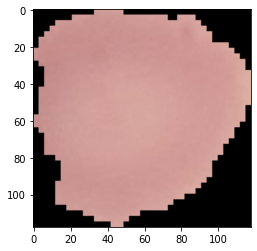

In [20]:
plt.imshow(imread(Uninfected_first))

In [21]:
imread(Uninfected_first).shape

(118, 118, 3)

In [22]:
len(os.listdir(train_path+'/parasitized')),len(os.listdir(train_path+'/uninfected'))

(12480, 12480)

In [23]:
len(os.listdir(test_path+'/uninfected')),len(os.listdir(test_path+'/uninfected'))

(1300, 1300)

In [24]:
dim1= []
dim2= []
for image_filename in os.listdir(os.path.join(test_path,'uninfected')):
  img = imread(os.path.join(test_path,'uninfected',image_filename))
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

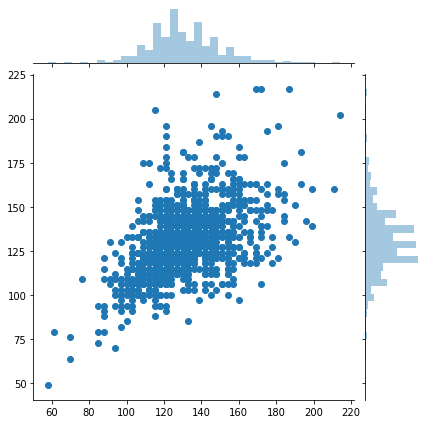

In [25]:
sns.jointplot(dim1,dim2)

In [26]:
np.mean(dim1),np.mean(dim2)

(130.92538461538462, 130.75)

In [27]:
image_shape= (130,130,3)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               #rescale= put 1/255 if values in 1-255
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

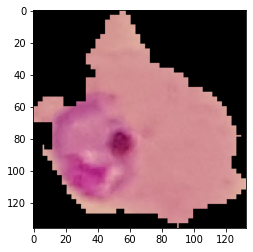

In [30]:
test_par_first_image = imread(test_par_first)
plt.imshow(test_par_first_image)

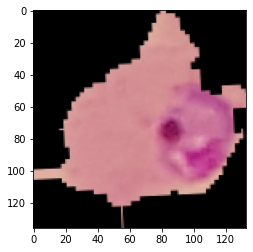

In [31]:
plt.imshow(image_gen.random_transform(test_par_first_image))

In [32]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [33]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [34]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense, Dropout 

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [41]:
batch_size=16

In [43]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [65]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [48]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 807s 517ms/step - loss: 0.9868 - accuracy: 0.5440 - val_loss: 0.6873 - val_accuracy: 0.5681
Epoch 2/20
1560/1560 [==============================] - 802s 514ms/step - loss: 0.6794 - accuracy: 0.5724 - val_loss: 0.6813 - val_accuracy: 0.5604
Epoch 3/20
1560/1560 [==============================] - 791s 507ms/step - loss: 0.6703 - accuracy: 0.5947 - val_loss: 0.6918 - val_accuracy: 0.5531
Epoch 4/20
1560/1560 [==============================] - 803s 515ms/step - loss: 0.3689 - accuracy: 0.8403 - val_loss: 0.2292 - val_accuracy: 0.9288
Epoch 5/20
1560/1560 [==============================] - 815s 523ms/step - loss: 0.2098 - accuracy: 0.9352 - val_loss: 0.1831 - val_accuracy: 0.9373
Epoch 6/20
1560/1560 [==============================] - 814s 522ms/step - loss: 0.1817 - accuracy: 0.9438 - val_loss: 0.2153 - val_accuracy: 0.9277
Epoch 7/20
1560/1560 [==============================] - 811s 520ms/step - loss: 0.1744 - accuracy: 0.9460 - val_

In [49]:
model_history = pd.DataFrame(model.history.history)

In [62]:
model_history.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

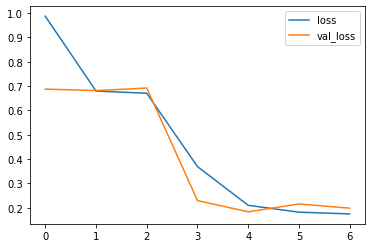

In [63]:
model_history[['loss', 'val_loss']].plot()

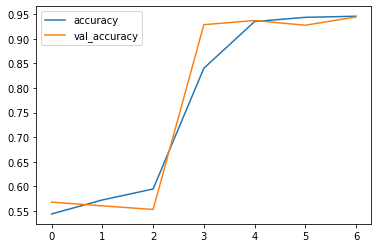

In [64]:
model_history[['accuracy', 'val_accuracy']].plot()

In [66]:
pred = model.predict_generator(test_image_gen)

In [67]:
predictions = pred >0.5

In [68]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [69]:
len(pred)

2600

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1300
           1       0.94      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [72]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1223,   77],
       [  68, 1232]])

In [74]:
para_img = os.path.join(test_path,'parasitized',test_first_para)

In [75]:
from tensorflow.keras.preprocessing import image

In [79]:
my_image = image.load_img(para_img,target_size=image_shape)

In [80]:
my_img_arr = image.img_to_array(my_image)

In [83]:
my_img_arr.shape

(130, 130, 3)

In [85]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [86]:
model.predict(my_img_arr)

array([[0.00044145]], dtype=float32)